In [1]:
# Importing libraries.

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
grade_4_math = pd.read_csv('input_data/grade_4_math_all_years.csv')

In [3]:
grade_4_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             561 non-null    int64  
 1   state            561 non-null    object 
 2   poverty_percent  561 non-null    float64
 3   median_income    561 non-null    int64  
 4   average_score    561 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 22.0+ KB


In [68]:
grade_4_math['average_score'] = grade_4_math['average_score'].apply(pd.to_numeric, errors = 'coerce')
grade_4_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             561 non-null    int64  
 1   state            561 non-null    object 
 2   poverty_percent  561 non-null    float64
 3   median_income    561 non-null    int64  
 4   average_score    544 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 22.0+ KB


In [69]:
grade_4_math['median_income'] = grade_4_math['median_income'].astype(float)
grade_4_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             561 non-null    int64  
 1   state            561 non-null    object 
 2   poverty_percent  561 non-null    float64
 3   median_income    561 non-null    float64
 4   average_score    544 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 22.0+ KB


In [70]:
grade_4_math.head()

,year,state,poverty_percent,median_income,average_score
0,2019,Alabama,15.6,51771.0,230.0
1,2019,Alaska,10.2,77203.0,232.0
2,2019,Arizona,13.5,62027.0,238.0
3,2019,Arkansas,16.0,49020.0,233.0
4,2019,California,11.8,80423.0,235.0


In [71]:
grade_4_math.describe()

,year,poverty_percent,median_income,average_score
count,561.000000,561.000000,561.000000,544.000000
mean,2008.636364,13.233155,50208.005348,236.474265
std,6.911664,3.313113,11678.155286,8.915982
min,1996.000000,5.600000,25760.000000,187.000000
25%,2003.000000,10.700000,41984.000000,232.000000
50%,2009.000000,12.700000,48325.000000,238.000000
75%,2015.000000,15.800000,56985.000000,242.250000
max,2019.000000,23.900000,90395.000000,253.000000


In [72]:
# drop year, state, median income column
score_vs_poverty = grade_4_math.drop(columns ='year')
score_vs_poverty = score_vs_poverty.drop(columns ='state')
score_vs_poverty = score_vs_poverty.drop(columns ='median_income')
score_vs_poverty

,poverty_percent,average_score
0,15.6,230.0
1,10.2,232.0
2,13.5,238.0
3,16.0,233.0
4,11.8,235.0
...,...,...
556,11.5,223.0
557,11.5,225.0
558,19.9,223.0
559,8.7,231.0


In [73]:
score_vs_poverty.isnull().sum()

poverty_percent     0
average_score      17
dtype: int64

In [74]:
score_vs_poverty = score_vs_poverty.dropna()

In [75]:
score_vs_poverty.isnull().sum()

poverty_percent    0
average_score      0
dtype: int64

In [76]:
score_vs_poverty

,poverty_percent,average_score
0,15.6,230.0
1,10.2,232.0
2,13.5,238.0
3,16.0,233.0
4,11.8,235.0
...,...,...
556,11.5,223.0
557,11.5,225.0
558,19.9,223.0
559,8.7,231.0


In [77]:
score_vs_poverty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 560
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   poverty_percent  544 non-null    float64
 1   average_score    544 non-null    float64
dtypes: float64(2)
memory usage: 12.8 KB


In [78]:
# Divide the Data into Attributes & Labels

x = score_vs_poverty.iloc[:, :-1].values    
y = score_vs_poverty.iloc[:, 1].values

In [79]:
# Split Data into Training & Test Sets.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [80]:
# Train the Algorithm.

from sklearn.linear_model import LinearRegression  
regression = LinearRegression()  
regression.fit(x_train, y_train) 

LinearRegression()

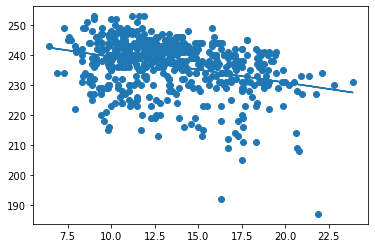

In [81]:
# Plotting the regression line
line = regression.coef_ * x + regression.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [82]:
# Predict Scores for the Model.

print(x_test) 
y_pred = regression.predict(x_test)


[[16.3]
 [10.7]
 [ 9.4]
 [10.8]
 [ 6.9]
 [10.4]
 [11.1]
 [17.6]
 [15.6]
 [11.5]
 [ 9.4]
 [12.8]
 [15.8]
 [11.5]
 [14.7]
 [16.7]
 [15. ]
 [10.9]
 [ 9.6]
 [15. ]
 [14. ]
 [15.6]
 [12.3]
 [10.3]
 [11.5]
 [10.7]
 [15.5]
 [20.9]
 [18.9]
 [12.9]
 [10.3]
 [11.6]
 [14. ]
 [10.7]
 [11.6]
 [11.6]
 [11. ]
 [14.9]
 [12. ]
 [12.2]
 [16. ]
 [10.6]
 [13.1]
 [13.9]
 [10.1]
 [10.1]
 [ 9. ]
 [14.2]
 [ 8.8]
 [10.7]
 [ 7.3]
 [15.8]
 [ 7.6]
 [13. ]
 [11. ]
 [15.9]
 [10.2]
 [14.8]
 [ 9.8]
 [12.7]
 [12.6]
 [17.1]
 [14.5]
 [ 9.9]
 [10.6]
 [16.8]
 [ 9.5]
 [13.3]
 [16.6]
 [10.8]
 [14.8]
 [18.5]
 [11.5]
 [19.9]
 [17.9]
 [16.1]
 [13.2]
 [12.5]
 [12.2]
 [14.1]
 [ 9.9]
 [17.5]
 [12. ]
 [12.3]
 [14.3]
 [10.6]
 [12.3]
 [19. ]
 [11.2]
 [18.4]
 [13. ]
 [10.8]
 [17.5]
 [13.2]
 [ 8.5]
 [10.2]
 [15. ]
 [11. ]
 [ 8.6]
 [11.4]
 [16.8]
 [18.3]
 [12.6]
 [16. ]
 [13.4]
 [10.8]
 [12.4]
 [13.5]
 [18.6]
 [19.9]
 [ 9.5]
 [21. ]
 [ 9. ]
 [18.7]
 [17.6]
 [17.3]
 [17. ]
 [10.8]
 [ 9.9]
 [13.5]
 [10.6]
 [17.2]
 [13.6]
 [17. ]
 [11.7]


In [83]:
# Compare Actual Data vs Predicted Data

score_vs_poverty = pd.DataFrame({"Actual Scores": y_test, "Predicted Scores": y_pred})
score_vs_poverty

,Actual Scores,Predicted Scores
0,244.0,234.058465
1,238.0,238.863012
2,220.0,239.978353
3,243.0,238.777216
4,234.0,242.123240
...,...,...
131,230.0,236.632329
132,241.0,237.661875
133,228.0,239.978353
134,241.0,235.945965


In [84]:
pd.DataFrame(np.c_[x_test,y_test,y_pred], columns=["Poverty Percentage","Actual Scores","Predicted Scores"])

,Poverty Percentage,Actual Scores,Predicted Scores
0,16.3,244.0,234.058465
1,10.7,238.0,238.863012
2,9.4,220.0,239.978353
3,10.8,243.0,238.777216
4,6.9,234.0,242.123240
...,...,...,...
131,13.3,230.0,236.632329
132,12.1,241.0,237.661875
133,9.4,228.0,239.978353
134,14.1,241.0,235.945965


In [85]:
# Test with Custom Data.

poverty_percentage = [[25.0]]
prediction = regression.predict(poverty_percentage)
print("Poverty Percentage = {}".format(poverty_percentage))
print("Predicted Score = {}".format(prediction[0]))

Poverty Percentage = [[25.0]]
Predicted Score = 226.5942580288717


In [86]:
# Test with Custom Data.

poverty_percentage = [[5.0]]
prediction = regression.predict(poverty_percentage)
print("Poverty Percentage = {}".format(poverty_percentage))
print("Predicted Score = {}".format(prediction[0]))

Poverty Percentage = [[5.0]]
Predicted Score = 243.7533541879368


In [87]:
# Evaluate Performance of Algorithm.

from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 6.639496257189555
